Avocado Project
Project Description
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
Some relevant columns in the dataset:
•	Date - The date of the observation
•	AveragePrice - the average price of a single avocado
•	type - conventional or organic
•	year - the year
•	Region - the city or region of the observation
•	Total Volume - Total number of avocados sold
•	4046 - Total number of avocados with PLU 4046 sold
•	4225 - Total number of avocados with PLU 4225 sold
•	4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label 
The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file. 

Dataset Link-
•	https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip



Importing of Libraries

# Avacado project as Regression problem

In [31]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.preprocessing import power_transform
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats.mstats import normaltest
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import roc_curve
from sklearn.metrics  import roc_auc_score
from sklearn.metrics import r2_score
from scipy.stats.mstats import normaltest
import warnings
warnings.filterwarnings('ignore')

Extracting the Data

In [35]:
Avocado=pd.read_csv('avocado.csv')
Avocado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


The input contains boths label and target variable.
In task 1, "Average Price" is the target variable which contains continuous data, so it is a regression type problem.
In task 2, "Region" is the target variable which has classes, so it is a classification problem.


In [40]:
Avocado.shape

(18249, 14)

 we can see that  we have 18249 rows and  14 columns ie attributes and when we check the shape its showing 14 which mean one column is target and it is 'AveragePrice'

In [43]:
Avocado.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [44]:
Avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


All the the 14 columns have No Null values and out of 14 attributes or input columns we have only 1 columns as output and and rest all are 15 columns are int -02,objectt-03 and Float=09. and object has to be changed using Ordinal encoder

In [45]:
Avocado.columns = Avocado.columns.str.replace(' ', '_')
Avocado.columns

Index(['Unnamed:_0', 'Date', 'AveragePrice', 'Total_Volume', '4046', '4225',
       '4770', 'Total_Bags', 'Small_Bags', 'Large_Bags', 'XLarge_Bags', 'type',
       'year', 'region'],
      dtype='object')

 Input features: Unnamed:_0','Date',,Total_Volume','4046','4225','4770','Total_Bags','Small_Bags','Large_Bags', 'XLarge_Bags', 'type', 'year','region 
 Output Features-'AveragePrice'

In [46]:
Avocado.isnull().sum()     #no Missing Values

Unnamed:_0      0
Date            0
AveragePrice    0
Total_Volume    0
4046            0
4225            0
4770            0
Total_Bags      0
Small_Bags      0
Large_Bags      0
XLarge_Bags     0
type            0
year            0
region          0
dtype: int64

Here we can clearly see that we have 0 null values in all the columns . .

In [47]:
# Changing date column from object type to Date Type
Avocado['Date']=pd.to_datetime(Avocado['Date'])


In [48]:
Avocado['Month']=Avocado['Date'].apply(lambda x:x.month)
Avocado['Day']=Avocado['Date'].apply(lambda x:x.day)

In [49]:
Avocado

,Unnamed:_0,Date,AveragePrice,Total_Volume,4046,4225,4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region,Month,Day
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


In [50]:
# Now Lets Drop Date columns from the dataset bcz we have already made the columns for Month and day in the dateset above 
# Year columns was already pre mentioned in the dateset
#dropping the columns with very high multicollinearity
Avocado.drop(['Unnamed:_0','Date'],axis=1,inplace=True)
Avocado

,AveragePrice,Total_Volume,4046,4225,4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


In [51]:
#dropping duplicate rows and resetting index
Avocado=Avocado.drop_duplicates()
print('Number of rows after removing duplicates=', len(Avocado))

Number of rows after removing duplicates= 18249


<AxesSubplot:>

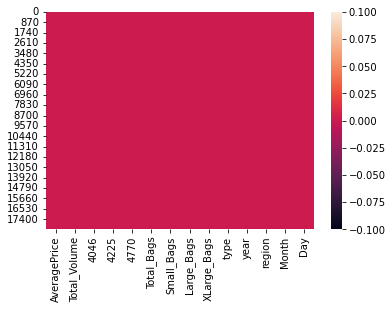

In [52]:
sns.heatmap(Avocado.isnull())

Hence, No Null Values in the dataframe

In [53]:
Avocado.duplicated().sum()# No Duplicate Values

0

In [54]:
Avocado.isnull().sum()

AveragePrice    0
Total_Volume    0
4046            0
4225            0
4770            0
Total_Bags      0
Small_Bags      0
Large_Bags      0
XLarge_Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

Univariate Analysis 'Subscribed' variable

In [55]:
#Frequency of 'AveragePrice'
Avocado['AveragePrice'].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64

<AxesSubplot:xlabel='AveragePrice', ylabel='count'>

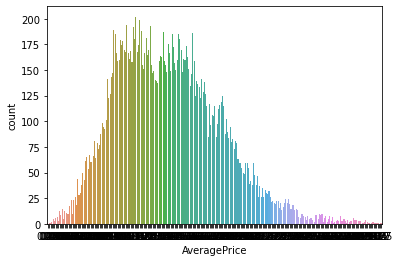

In [56]:
# Plotting the 'AveragePrice' frequency
sns.countplot(data=Avocado,x='AveragePrice')

In [57]:
#Normalizing the frequency table of 'AveragePrice' variable
Avocado['AveragePrice'].value_counts(normalize=True)

1.15    0.011069
1.18    0.010905
1.08    0.010631
1.26    0.010576
1.13    0.010521
          ...   
3.25    0.000055
3.12    0.000055
2.68    0.000055
3.03    0.000055
3.17    0.000055
Name: AveragePrice, Length: 259, dtype: float64

In [58]:
#Frequency table
Avocado['AveragePrice'].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64

# EDA

Encoding Techniques

In [59]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for i in Avocado.columns:
    if Avocado[i].dtypes=='object':
        Avocado[i]=enc.fit_transform(Avocado[i].values.reshape(-1,1))
Avocado.tail(20)

,AveragePrice,Total_Volume,4046,4225,4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region,Month,Day
18229,1.49,301985.61,34200.18,49139.34,85.58,218560.51,99989.62,118314.77,256.12,1.0,2018,52.0,2,25
18230,1.64,224798.60,30149.00,38800.64,123.13,155725.83,120428.13,35257.73,39.97,1.0,2018,52.0,2,18
18231,1.47,275248.53,24732.55,61713.53,243.00,188559.45,88497.05,99810.80,251.60,1.0,2018,52.0,2,11
18232,1.41,283378.47,22474.66,55360.49,133.41,205409.91,70232.59,134666.91,510.41,1.0,2018,52.0,2,4
18233,1.80,185974.53,22918.40,33051.14,93.52,129911.47,77822.23,51986.86,102.38,1.0,2018,52.0,1,28
18234,1.83,189317.99,27049.44,33561.32,439.47,128267.76,76091.99,51947.50,228.27,1.0,2018,52.0,1,21
18235,1.82,207999.67,33869.12,47435.14,433.52,126261.89,89115.78,37133.99,12.12,1.0,2018,52.0,1,14
18236,1.48,297190.60,34734.97,62967.74,157.77,199330.12,103761.55,95544.39,24.18,1.0,2018,52.0,1,7
18237,1.62,15303.40,2325.30,2171.66,0.00,10806.44,10569.80,236.64,0.00,1.0,2018,53.0,3,25
18238,1.56,15896.38,2055.35,1499.55,0.00,12341.48,12114.81,226.67,0.00,1.0,2018,53.0,3,18


Region  and Type is conveted into float  from Object  

In [60]:
Avocado.dtypes

AveragePrice    float64
Total_Volume    float64
4046            float64
4225            float64
4770            float64
Total_Bags      float64
Small_Bags      float64
Large_Bags      float64
XLarge_Bags     float64
type            float64
year              int64
region          float64
Month             int64
Day               int64
dtype: object

So here we can that our target variable 'AveragePrice' is in float format ,and by this we can make the decision that we have to build a Regression Model. . 

Visualization using Count and Bar Plot for Input and output Variables

In [ ]:
for column in Avocado.columns:
    sns.barplot(x=column,y='AveragePrice',data=Avocado)
    plt.xlabel(column)
    plt.show()

In [ ]:
for column in Avocado.columns:
    sns.countplot(x=column, data=Avocado)
    plt.xlabel(column)
    plt.ylabel('W')
    plt.show()

Histogram View 

In [ ]:
Avocado.hist(bins=10, figsize=(20,20))

# Bivarate

In [ ]:
sns.scatterplot(x='type',y='AveragePrice',data=Avocado)

In [ ]:
sns.scatterplot(x='Total_Volume',y='AveragePrice',data=Avocado)

In [ ]:
sns.scatterplot(x='4046',y='AveragePrice',data=Avocado)

In [ ]:
sns.scatterplot(x='4225',y='AveragePrice',data=Avocado)

In [ ]:
sns.scatterplot(x='Total_Bags',y='AveragePrice',data=Avocado)

In [ ]:
sns.scatterplot(x='4770',y='AveragePrice',data=Avocado)

In [ ]:
sns.scatterplot(x='Small_Bags',y='AveragePrice',data=Avocado)

In [ ]:
sns.scatterplot(x='Large_Bags',y='AveragePrice',data=Avocado)

In [ ]:
sns.scatterplot(x='XLarge_Bags',y='AveragePrice',data=Avocado)

In [ ]:
sns.scatterplot(x='year',y='AveragePrice',data=Avocado)

In [ ]:
sns.scatterplot(x='region',y='AveragePrice',data=Avocado)

In [ ]:
sns.scatterplot(x='Month',y='AveragePrice',data=Avocado)

In [ ]:
sns.scatterplot(x='Day',y='AveragePrice',data=Avocado)

Multivariate Analysis

In [ ]:
plt.figure(figsize=(25,30))
sns.pairplot(Avocado)
plt.show()

Now Lets See that counts of each columns

In [ ]:
for i in Avocado.columns:
        print(Avocado[i].value_counts())
        print('*'*100)

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(Avocado.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [ ]:
#checking the columns which are positively and negatively correlated
plt.figure(figsize=(25,30))
Avocado.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('columns with target names',fontsize=14)
plt.title('CORRELATION',fontsize=18)
plt.show()

Here  positive correlated columns are upwards and Negative are    Downwards

4046,Total Volume and Total Bags are highly correlated to many columns.
AveragePrice is negitively correalted to all of the columns.

Now Lets Delete the columns which are Negatively corrlated to target variable

In [ ]:
#dropping the columns with very high multicollinearity
Avocado.drop(['4046','Total_Bags','Total_Volume'],axis=1,inplace=True)
Avocado

In [ ]:
#to analyse the correlation of each column
Avocado.corr()

In [ ]:
Avocado.corr()['AveragePrice'].sort_values()

# DESCRIPTIVE STATSTICS

In [ ]:
Avocado.describe().T

*Its Clearly shown above that all the columns have the count value of 18249 there are no negative values in the dataset and Few columns have very low values in it, where few have very high values in the datset.

In [ ]:
plt.figure(figsize = (22,7))
sns.heatmap(Avocado.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

Outcome of describe() of dataset :-
from the above plotting we are determining mean,standard deviation,minimum and maximum value of each column



In [ ]:
Avocado.info()

OUTLIERS CHECKING(Any One outlier method can be  used)

In [ ]:
colmlist=Avocado.columns.values
ncol=30
nrows=14

In [ ]:
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(colmlist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data= Avocado[colmlist[i]],color='green',orient='v')
    plt.tight_layout()

In [ ]:
# to find out outliers in the dataset
Avocado.plot(kind='box',subplots=True,figsize=(20,10))

We can see that the Outliers are present in the columns R,ERA,SHO,SV and E ...we have to treat this Outliers ..

In [ ]:
#Lets plot all using Histogram and see the skewness again
 
#plt.rcParams['figure.figsize']=(20,20)
Avocado.hist(bins=25,color='green',density=True,label='Value',histtype='bar')
plt.show()

WE can see maximum data is not  normally distributed rest all are skewed or unbalanced data
Lets take some of the data and do some of the plotting of skewness although we can see all skewed columns on above plotting

Univariate Analysis

In [ ]:
sns.distplot(Avocado['type'])

type is not normally distributed ,its Skewed

In [ ]:
sns.distplot(Avocado['4225'])

4225 is also Normally distributed and skewed as per the graph

In [ ]:
 sns.distplot(Avocado['Small_Bags'])
    

 Normally distributed and Skewed as per the graph

In [ ]:
sns.distplot(Avocado['Large_Bags'])
    

Normally distributed and Skewed as per the graph

In [ ]:
sns.distplot(Avocado['XLarge_Bags'])
    

Normally distributed and Skewed as per the graph

In [ ]:
sns.distplot(Avocado['year'])

Normally distributed as per the graph ..

In [ ]:
sns.distplot(Avocado['region'])

Normally distributed and Skewed as per the graph

In [ ]:
sns.distplot(Avocado['Month'])

Normally distributed and Skewed as per the graph

In [ ]:
sns.distplot(Avocado['Day'])

Normally distributed and Skewed as per the graph

the data of the column is normalised ...The building block is out of normalized curve..It a right skewed data..
Maximum columns are normally distributed but some columns  have skewness. . . .


Normal distribution curve of outcome column is irrelevent

Now Lets Remove Outliers Now

In [ ]:
#to check for outliers through zscore 
from scipy.stats import zscore
(np.abs(zscore( Avocado)) < 3).all()

In [ ]:
#to remove outliers in data set through zscore
z = np.abs(zscore(Avocado))
z.shape

In [ ]:
threshold = 3
print(np.where(z>3))

In [ ]:
Avocado_new=Avocado[(z<3).all(axis=1)]
print(Avocado_new.shape)


In [ ]:
Avocado.shape

In [ ]:
print ("Old DataFrame =",Avocado.shape)
print ("New DataFrame =",Avocado_new.shape)
print ("Total dropped rows = ",Avocado.shape[0] - Avocado_new.shape[0])

In [ ]:
#to find % loss in data
loss = (18249-17657)/18249 * 100
print(loss)

In [ ]:
Avocado_new

Now Lets Split the dataset into dependent and independent variable*

In [ ]:
# Independent column

x=Avocado_new.iloc[:,1:]
x

In [ ]:
x.shape

In [ ]:
# Target or dependent variable

y=Avocado_new.iloc[0:,0]
y

In [ ]:
y.shape

# TRANSFORMING DATA TO REMOVE SKEWNESS

In [ ]:
Avocado.skew()

In [ ]:
#Lets plot all using Histogram and see the skewness again
 
plt.rcParams['figure.figsize']=(20,20)
Avocado.hist(bins=25,color='yellow',density=True,label='Value',histtype='bar')
plt.tight_layout()
plt.show()

there is skewness present  

Now Lets Remove Skewness Now

In [ ]:
Avocado_new.skew()

Here We have skewness ,. Now remove the skewness from the given columns

In [ ]:
Avocado_new.head()


In [ ]:
from sklearn.preprocessing import power_transform
x_new=power_transform(Avocado,method='yeo-johnson')

In [ ]:
pd.DataFrame(x_new).skew()

We can see that the skewness has been removed from the given columns  .

In [ ]:
# It will be a 2 dimensional data contaning rows and columns

from sklearn.preprocessing import StandardScaler
#transforming my dataset into a standard normal distribution
sc=StandardScaler()

x= pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

In [ ]:
x.mean()

In [ ]:
x.std()

Balancing the dataset over here,otherwise it will be a baised dataset

In [ ]:
x.shape

In [ ]:
y.value_counts()

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(y)

Now Lets Whether Multicollinearity is present in the dataset or not 

WE CHECK MULTICOLLINEARITY BY VARIANCE INFLATION FACTOR (VIF)

In [ ]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["FEATURES"]=x.columns
    print (vif)

In [ ]:
vif_cal()

#No Multicollinearity is present in the dataset...Here we can observe all the columns have VIF less than 10 which means we are free from multicollinearity problem. Let's move to buliding machine learning models...

Now Lets Train and Test the model using Regression Models

In [ ]:
# to find out best random state
max_r2=0
maxRs=0
for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    r2_score1=r2_score(y_test,pred_test)
    if r2_score1>max_r2:
        max_r2=r2_score1
        maxRs=i
print("Best r2_score is ", max_r2,"on Random_State",maxRs)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=95)

In [ ]:
x_train

In [ ]:
x_test

In [ ]:
y_train

In [ ]:
y_test

  REGRESSION,ENSEMBLE TECHNIQUE(GradientBoostingClassifier,RandomForestClassifier)

In [ ]:
models=[SVR(),DecisionTreeRegressor(),LinearRegression(),RandomForestRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),AdaBoostRegressor()]

In [ ]:
maelist=[]
mselist=[]
rmselist=[]
r2list=[]
def create_model(model):
    m=model
    m.fit(x_train,y_train)
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    p=m.predict(x_test)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    mae=mean_absolute_error(p,y_test)
    mse=mean_squared_error(p,y_test)
    rmse=np.sqrt(mean_squared_error(p,y_test))
    r2=r2_score(y_test,p)
    score=cross_val_score(m,x,y,cv=5)
    crossval=score.mean()
    
    maelist.append(mae)
    mselist.append(mse)
    rmselist.append(rmse)
    r2list.append(r2)
    plt.figure(figsize=(10,10))
    sns.regplot(y_test,predm,color="purple")
    plt.show()
    print(m)
    print('Mean absolute error',mae)
    print('Mean squared error',mse)
    print('Root Mean squared error',rmse)
    print('R2 Score',r2)
    print (f"At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)}")
    print (f"At random state {i},the testing accuracy is :- {r2_score(y_test,pred_test)}")
    print("Cross Validation Score:",crossval)
    print("Difference Between r2_score and CrossValidation Score:",abs(r2-crossval))
    print('---------------------------------------------------------------------------------------------------------')

In [ ]:
for i in models:
    create_model(i)

Now Lets consider model which Model should we go for as a final model

Hyper parameter tuning

In [ ]:
params = {'n_estimators': [13,15,17],
         'max_depth':[5,6],
         'min_samples_split':[5,6],
         'min_samples_leaf':[3,5,6]
         }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
RSCV = RandomizedSearchCV(RandomForestRegressor(),params, cv=5)

In [ ]:
RSCV.fit(x_train, y_train)

In [ ]:
RSCV.best_params_

In [ ]:
Final_Model = RandomForestRegressor(n_estimators=17,min_samples_split=6,min_samples_leaf=5,max_depth=6)
Classifier = Final_Model.fit(x_train, y_train)
lr_pred = Final_Model.predict(x_test)
lr_r2_score = r2_score(y_test, lr_pred, multioutput='variance_weighted')
print(f"R2 score for the Final Model is:", lr_r2_score*100)

In [ ]:
Final_Model

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'n_estimators': [13,15,17],
         'max_depth':[5,6],
         'min_samples_split':[5,6],
         'min_samples_leaf':[3,5,6]
         }

In [ ]:
GSCV=GridSearchCV(RandomForestRegressor(),params, cv=5)


In [ ]:
GSCV.fit(x_train,y_train)

In [ ]:
GSCV.best_params_

In [ ]:
Last_Model = RandomForestRegressor(n_estimators=15,min_samples_split=5,min_samples_leaf=3,max_depth=6)
Classifier = Last_Model.fit(x_train, y_train)
lr_pred = Last_Model.predict(x_test)
lr_r2_score = r2_score(y_test, lr_pred, multioutput='variance_weighted')
print(f"R2 score for the Last_Model is:", lr_r2_score*100)

In [ ]:
Last_Model

In [ ]:
# to improve accuracy of model
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [ ]:
lasso= Lasso(alpha=0.0001)

In [ ]:
lasso.fit(x_train,y_train)

In [ ]:
lasso.score(x_train,y_train)

In [ ]:
lasso_pred=lasso.predict(x_test)

In [ ]:
r2_score(y_test,lasso_pred)

In [ ]:
ridge=Ridge(alpha=0.1)

In [ ]:
ridge.fit(x_train,y_train)

In [ ]:
ridge.score(x_train,y_train)*100

In [ ]:
ridge_pred=ridge.predict(x_test)

In [ ]:
r2_score(y_test,ridge_pred)

save the final model

In [ ]:
#saving the model
import joblib
joblib.dump(Final_Model,'Avocado.pkl')

In [ ]:
#Loading the saved model
AV=joblib.load('Avocado.pkl')

Prediction

In [ ]:
prediction =AV.predict(x_test)
prediction

In [ ]:
pd.DataFrame([AV.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

In [ ]:
import pickle
filename = 'Avocado.pkl'
pickle.dump(Final_Model,open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
predicted = loaded_model.score(x_test,y_test)*100
print(predicted)

# Avacado project as Classifier problem


In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.preprocessing import power_transform
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics  import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

Extracting the Data

In [ ]:
Avocado_Reg=pd.read_csv('avocado.csv')
Avocado_Reg

In [ ]:
# List of values in the target column
Avocado['region'].value_counts()

In [ ]:
#Frequency of 'region'
Avocado['region'].value_counts()

In [ ]:
# Plotting the 'region' frequency
sns.countplot(data=Avocado,x='region')

In [ ]:
#Normalizing the frequency table of 'region' variable
Avocado['region'].value_counts(normalize=True)

In [ ]:
#Frequency table
Avocado['region'].value_counts()

In [ ]:
Avocado.corr()

In [ ]:
Avocado.corr()['region'].sort_values()

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(Avocado.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [ ]:
#checking the columns which are positively and negatively correlated
plt.figure(figsize=(25,30))
Avocado.corr()['region'].sort_values(ascending=False).drop(['region']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('columns with target names',fontsize=14)
plt.title('CORRELATION',fontsize=18)
plt.show()

In [ ]:
#to check for outliers through zscore 
from scipy.stats import zscore
(np.abs(zscore( Avocado)) < 3).all()

In [ ]:
threshold = 3
print(np.where(z>3))

In [ ]:
Avocado_new=Avocado[(z<3).all(axis=1)]
print(Avocado_new.shape)


In [ ]:
Avocado_new=Avocado[(z<3).all(axis=1)]
Avocado_new

In [ ]:
print(Avocado.shape)
print(Avocado_new.shape)

In [ ]:
#to find % loss in data
loss = (18249-17657)/18249 * 100
print(loss)


In [ ]:
Avocado_new.skew()

Removing skewness using yeo-johnson  method to get better prediction

In [ ]:
from sklearn.preprocessing import power_transform
x_new=power_transform(Avocado,method='yeo-johnson')

In [ ]:
pd.DataFrame(x_new).skew()

In [ ]:
# It will be a 2 dimensional data containg rows and columns

from sklearn.preprocessing import StandardScaler
#transforming my dataset into a standard normal distribution
sc=StandardScaler()

x= pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

In [ ]:
x.mean()

In [ ]:
x.std()

In [ ]:
Avocado_new['region'].value_counts()

In [ ]:
x.shape

In [ ]:
y.shape

WE CHECK MULTICOLLINEARITY BY VARIANCE INFLATION FACTOR (VIF)

In [ ]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["FEATURES"]=x.columns
    print (vif)

In [ ]:
vif_cal()

In [ ]:
Avocado_new

In [ ]:
#seperate feature variable and target variable
x = Avocado_new.drop (['region'], axis = 1)
y = Avocado_new['region']

In [ ]:
x

In [ ]:
y

In [ ]:
# to predict best random state value
maxAcc =0
maxRS=0

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print('Best accuracy is',maxAcc,'on Random_State',maxRS)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=35)

In [ ]:
x_train

In [ ]:
x_test

In [ ]:
y_train

In [ ]:
y_test

In [ ]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
gb = GradientBoostingClassifier()
RF = RandomForestClassifier()
ada = AdaBoostClassifier()

model=[lg,gnb,svc,dtc,knn,RF,gb,ada]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy_score:",m,'is')
    print(confusion_matrix(y_test, predm))
    print(accuracy_score(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

In [ ]:
#cross validation to check the accuracy score
print('cross validation score of random forest model = ', cross_val_score(RF,x,y,cv=None).mean())
print('cross validation score of logistic regression model = ', cross_val_score(lg,x,y,cv=None).mean())
print('cross validation score of decison tree model = ', cross_val_score(dtc,x,y,cv=None).mean())
print('cross validation score of  KNeighborsClassifier model = ', cross_val_score(knn,x,y,cv=None).mean())
print('cross validation score of standard vector machine model = ', cross_val_score(svc,x,y,cv=None).mean())
print('cross validation score of GaussianNB model = ', cross_val_score(gnb,x,y,cv=None).mean())
print('cross validation score of AdaBoostingClassifier model = ',cross_val_score(ada,x,y,cv=None).mean())
print('cross validation score of GradientBoostingClassifier model = ',cross_val_score(gb,x,y,cv=None).mean())


In [ ]:

# hyperparameter tuning with RandomForestClassifier, parameters of RandomForestClassifier
parameters ={'n_estimators':[200], 'criterion':['gini'], 
             'min_samples_split':[5], 'min_samples_leaf':[2], 
              'bootstrap':[True],'n_jobs':[-1], 'random_state':[35]}

In [ ]:
# hyperparameter tuning with gridsearchCV
gcv = GridSearchCV(RandomForestClassifier(random_state=35), parameters, verbose=1, cv=10, n_jobs=-1)

In [ ]:
#training the model
gcv.fit(x_train,y_train)

In [ ]:
#finding out which parameter is giving best accuracy
gcv.best_params_

In [ ]:
type(gcv)

In [ ]:
# finding best estimator
gcv.best_estimator_

In [ ]:
# Applying the parameters to the final model
pred = gcv.best_estimator_.predict(x_test)
acc =accuracy_score(y_test,pred)
print(acc*100)

In [ ]:
#saving the model
import joblib
joblib.dump(gcv,'AvocadoClass.pkl')

In [ ]:
#Loading the saved model
Avc=joblib.load('AvocadoClass.pkl')

In [ ]:
prediction = Avc.predict(x_test)
prediction

In [ ]:
pd.DataFrame([Avc.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

In [ ]:
import pickle
filename = 'AvocadoClass.pkl'
pickle.dump(gcv,open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
predicted = loaded_model.score(x_test,y_test)*100
print(predicted)